<a href="https://colab.research.google.com/github/hexe007/space/blob/main/space.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING MOST IMPORTANT LIBRARIES

In [16]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier


#LOADING TRAIN AND TEST DATASETS

In [17]:
train_data = 'https://raw.githubusercontent.com/hexe007/space/main/train.csv'
test_data = 'https://raw.githubusercontent.com/hexe007/space/main/test.csv'

spaceship_train = pd.read_csv(train_data)
spaceship_test = pd.read_csv(test_data)

In [18]:
#Split PassengerIDs into PassengerID and Group for train and test dataset

new_cols = spaceship_train['PassengerId'].str.split('_', expand=True)
new_cols.columns = ['PassengerIds', 'Group']
spaceship_train = pd.concat([spaceship_train, new_cols], axis=1)
spaceship_train = spaceship_train.drop(['PassengerId'], axis=1)

new_cols = spaceship_test['PassengerId'].str.split('_', expand=True)
new_cols.columns = ['PassengerIds', 'Group']
spaceship_test = pd.concat([spaceship_test, new_cols], axis=1)
spaceship_test = spaceship_test.drop(['PassengerId'], axis=1)

In [19]:
spaceship_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerIds,Group
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01


In [20]:
spaceship_train.isna().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
PassengerIds      0
Group             0
dtype: int64

In [36]:
print(spaceship_train['PassengerIds'].dtype)

object


In [37]:
print(spaceship_train['Age'].dtype)

float64


In [38]:
print(spaceship_train['Transported'].dtype)

bool


# ELIMINATING NON NUMERICAL VALUES

In [21]:
spaceship_train_nonly = spaceship_train.select_dtypes(include=["float","int"])

#nonly - numbers only

# PLOTTING HISTOGRAMS

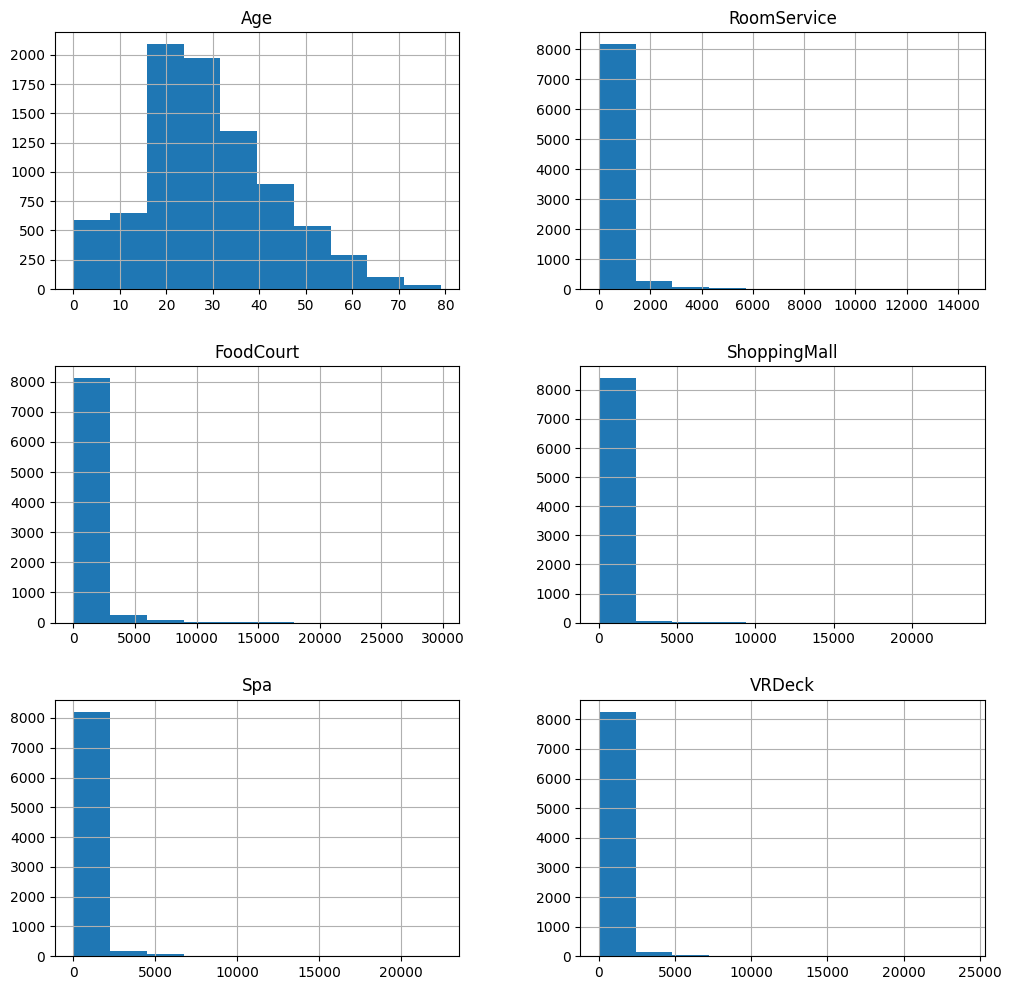

In [22]:
spaceship_train_nonly.hist(figsize = (12, 12))
plt.show()

In [23]:
missing_values = spaceship_train.isnull().sum()
print(missing_values)

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
PassengerIds      0
Group             0
dtype: int64


# DATA NORMALIZATION

In [24]:

data = spaceship_train['RoomService']

result = stats.anderson(data)

print('Statistic: %.3f' % result.statistic)

for i in range(len(result.critical_values)):
  sl, cv = result.significance_level[i], result.critical_values[i]
  if result.statistic < cv:
    print('%.1f%%: data looks normal' % (sl*100))
  else:
    print('%.1f%%: data does not look normal' % (sl*100))

Statistic: nan
1500.0%: data does not look normal
1000.0%: data does not look normal
500.0%: data does not look normal
250.0%: data does not look normal
100.0%: data does not look normal


# **CORRELATIONS**

<Axes: >

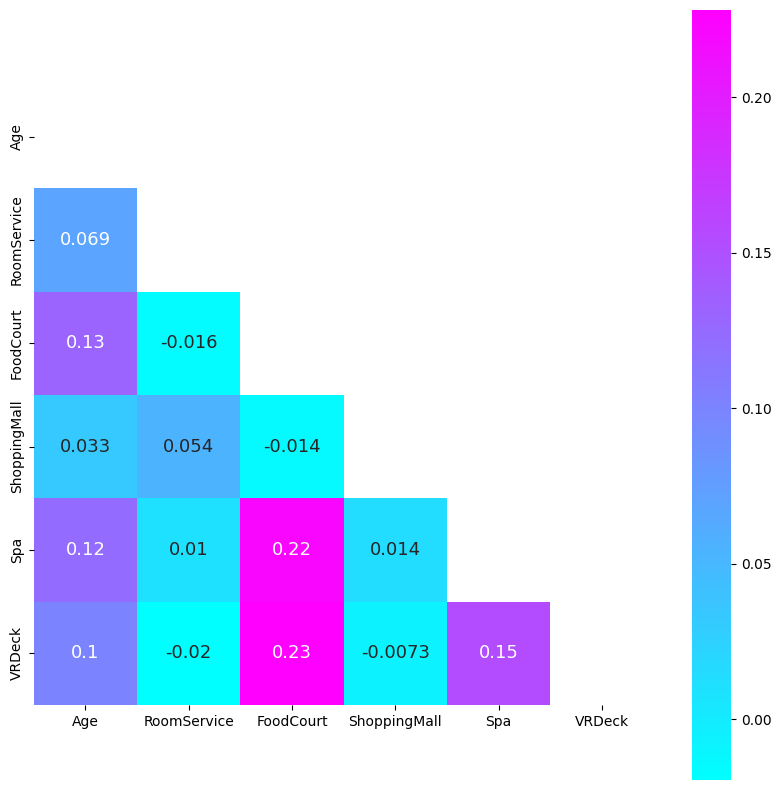

In [25]:

df_num = spaceship_train_nonly
plt.subplots(figsize=(10,10))
mask = np.triu(np.ones_like(df_num.corr()))
sns.heatmap(df_num.corr(), mask=mask, cmap='cool', annot=True, annot_kws={"fontsize":13}, square=True)



# DATASET BALANCE

In [26]:
target_skewness = stats.skew(df_num['Age'])
print(target_skewness)

nan


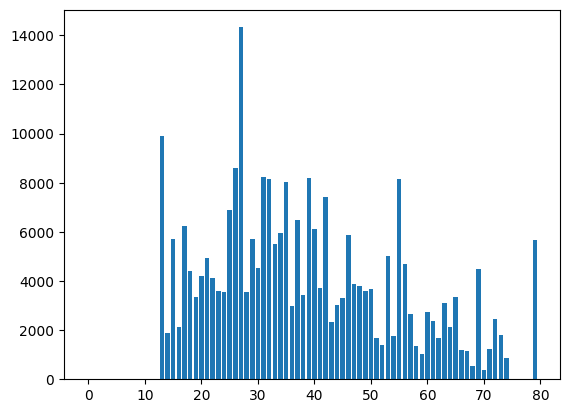

In [29]:
# Balanced of "Age"
plt.bar(df_num['Age'], df_num['RoomService'], label="Age vs RoomService")
plt.show()

In [35]:
# Balanced of "Group"" 	PassengerIds"
plt.bar(df_num['Group'], df_num['PassengerIds'], label="PassengerIds vs Group")
plt.show()

KeyError: ignored